In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [13]:
# Use inspect to see the preview of the table in the database 
inspector = inspect(engine)
tables = inspector.get_table_names()
print (f"The tables names in the database are {tables}")

The tables names in the database are ['measurement', 'station']


In [18]:
# Inspect the columns of the first table 
columns = inspector.get_columns(tables[0])
print("\nColumns in the table:")
for col in columns:
    print(f"{col['name']} - {col['type']}")


Columns in the table:
id - INTEGER
station - TEXT
date - TEXT
prcp - FLOAT
tobs - FLOAT


In [19]:
# Inspect the columns of the second table 
columns = inspector.get_columns(tables[1])
print("\nColumns in the table:")
for col in columns:
    print(f"{col['name']} - {col['type']}")


Columns in the table:
id - INTEGER
station - TEXT
name - TEXT
latitude - FLOAT
longitude - FLOAT
elevation - FLOAT


In [23]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/rn/h0jsj52532jgpm4cc66mm4rm0000gn/T/ipykernel_287/3537866735.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [27]:
# Reflect the database using autoload_with instead of reflect to avoid the above warrning messages 
Base = automap_base()
Base.prepare(autoload_with=engine)

In [28]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
# Find the most recent date in the data set.
Most_Recent_Date = session.query(func.max(Measurement.date)).first()
Most_Recent_Date

('2017-08-23',)

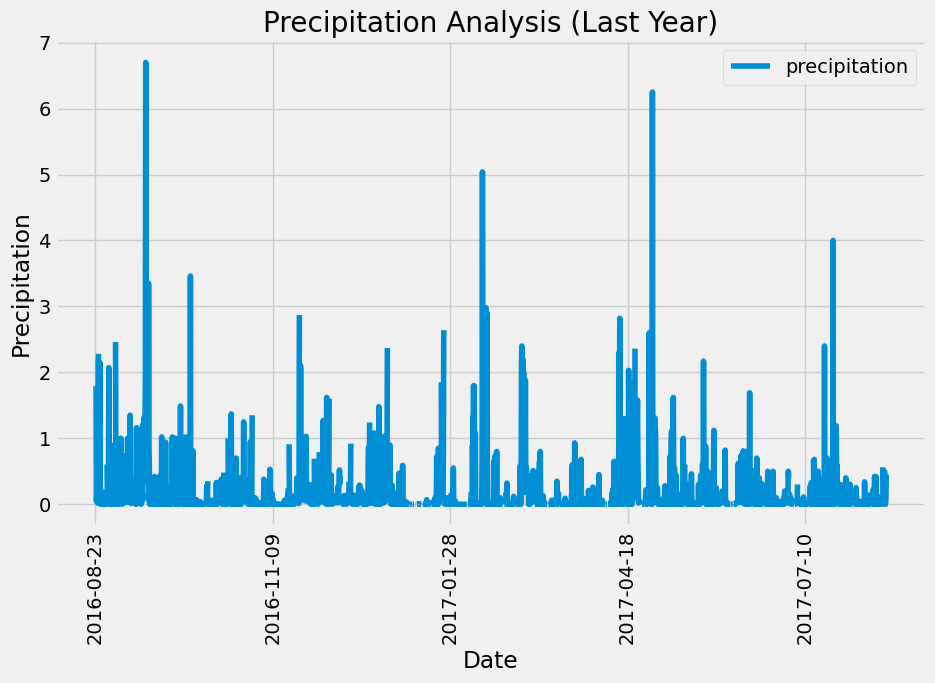

In [38]:
# Calculate the date one year from the last date in data set.
previous_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_preci_score = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_preci_scoreDF = pd.DataFrame(data_preci_score, columns=['date', 'precipitation'])

# Sort the dataframe by date
data_preci_scoreDF = data_preci_scoreDF.sort_values("date")
data_preci_scoreDF.head()

# Use Pandas Plotting with Matplotlib to plot the data
data_preci_scoreDF.plot(x='date', y='precipitation', figsize=(10, 6), rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Analysis (Last Year)")
plt.show()

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_preci_scoreDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

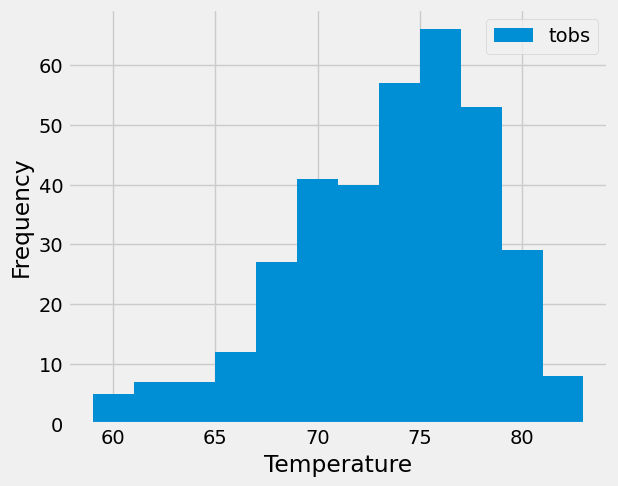

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()